# Simphony circuit simulator

[Simphony](https://simphonyphotonics.readthedocs.io/en/latest/) is a circuit simulator based on [scikit-rf](https://scikit-rf.readthedocs.io/en/latest/)

The main advantage of simphony over [SAX](https://flaport.github.io/sax/) is that simphony works in Windows, Linux and MacOs. While SAX only works on MacOs and Linux.

It also supports the SiEPIC PDK library natively.

## Component models

You can use component models from :

- Sparameters from Lumerical FDTD simulations thanks to the gdsfactory Lumerical plugin
- [SiPANN](https://sipann.readthedocs.io/en/latest/?badge=latest) open source package

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gdsfactory as gf

import gdsfactory.simulation.simphony as gs
import gdsfactory.simulation.simphony.components as gc

2022-06-30 06:16:45.663 | INFO     | gdsfactory.config:<module>:52 - Load '/home/runner/work/gdsfactory/gdsfactory/gdsfactory' 5.12.4


2022-06-30 06:16:47.093850: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-30 06:16:47.093897: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


INFO:tensorflow:Restoring parameters from /usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/SiPANN/ANN/TIGHT_ANGLE_GAP/model


2022-06-30 06:16:49.385605: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-30 06:16:49.385644: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-30 06:16:49.385667: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fv-az204-569): /proc/driver/nvidia/version does not exist
2022-06-30 06:16:49.386088: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-30 06:16:49.548872: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 op

INFO:tensorflow:Restoring parameters from /usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/SiPANN/ANN/TIGHT_ANGLE_STRAIGHT/model


INFO:tensorflow:Restoring parameters from /usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/SiPANN/ANN/TIGHT_ANGLE_BENT_RAND/model


In [2]:
c = gf.components.mzi()
n = c.get_netlist()

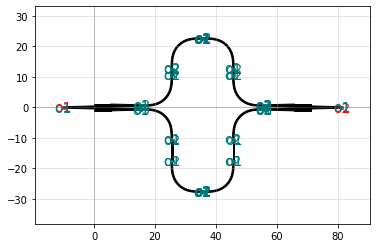

mzi: uid 2, ports ['o1', 'o2'], aliases [], 0 polygons, 20 references

In [3]:
c

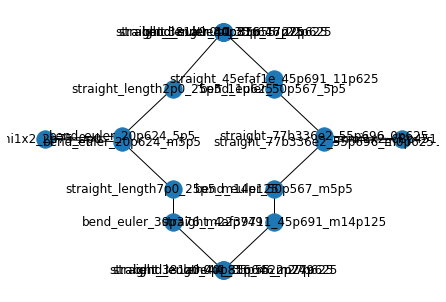

In [4]:
c.plot_netlist()

### Straight

Lets start with the Sparameter model of a straight waveguide.

The models are for lossless elements.

2022-06-30 06:16:51.077 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


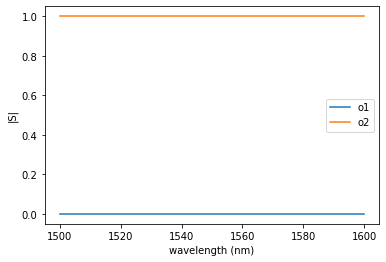

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [5]:
m = gc.straight()
wavelengths = np.linspace(1500, 1600, 128) * 1e-9
gs.plot_model(m, logscale=False, wavelengths=wavelengths)

2022-06-30 06:16:51.200 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


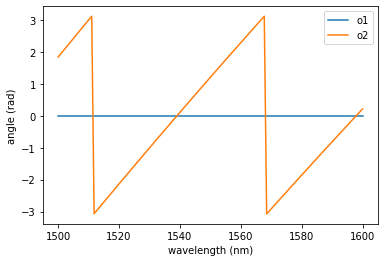

<AxesSubplot:xlabel='wavelength (nm)', ylabel='angle (rad)'>

In [6]:
m = gc.straight()
wavelengths = np.linspace(1500, 1600, 128) * 1e-9
gs.plot_model(m, phase=True, wavelengths=wavelengths)

### Bend

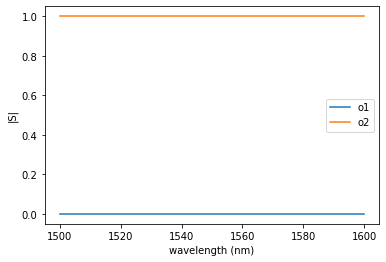

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [7]:
m = gc.bend_circular(radius=2)  # this bend should have some loss
gs.plot_model(m, logscale=False, wavelengths=wavelengths)

2022-06-30 06:16:51.456 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:130 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_eaca167b.dat


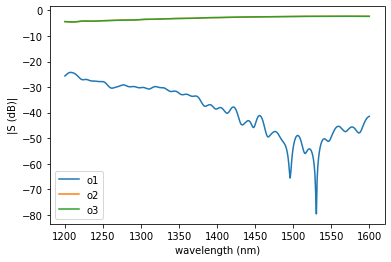

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [8]:
m = gc.mmi1x2()  # this model comes from Lumerical FDTD 3D sims
gs.plot_model(m, pin_in="o1")

2022-06-30 06:16:51.629 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:130 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_eaca167b.dat


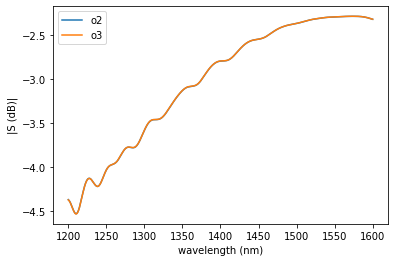

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [9]:
m = gc.mmi1x2()  # this model comes from Lumerical FDTD 3D sims
gs.plot_model(m, pin_in="o1", pins=["o2", "o3"])

2022-06-30 06:16:51.778 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:130 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_eaca167b.dat


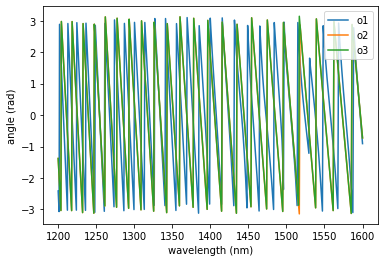

<AxesSubplot:xlabel='wavelength (nm)', ylabel='angle (rad)'>

In [10]:
m = gc.mmi1x2()
gs.plot_model(m, pin_in="o1", phase=True)

In [11]:
m.pins

In [12]:
pin = m.pins[0]

As you can see the MMI has -20dB reflection and -3dB transmission

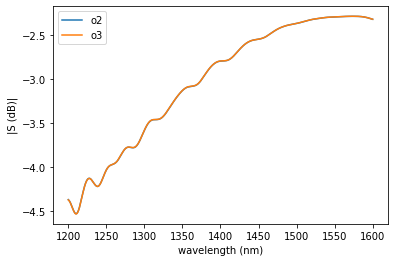

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [13]:
gs.plot_model(m, pins=("o2", "o3"))

2022-06-30 06:16:52.115 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:130 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi2x2_eaca167b.dat


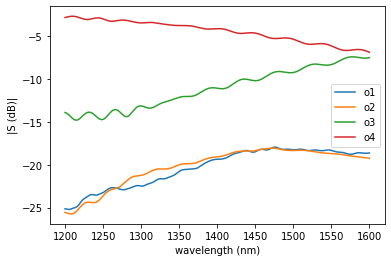

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [14]:
m = gc.mmi2x2()  # this model comes from Lumerical FDTD 3D sims
gs.plot_model(m)

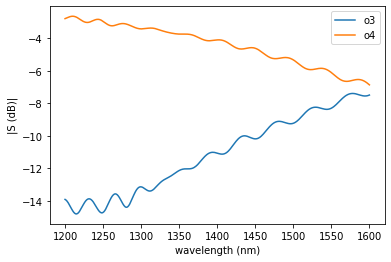

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [15]:
gs.plot_model(m, pins=("o3", "o4"))

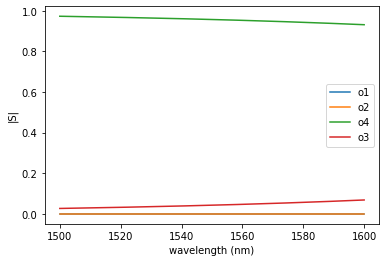

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [16]:
m = gc.coupler_ring()
gs.plot_model(m, logscale=False, wavelengths=wavelengths)

In [17]:
gc.coupler_ring?

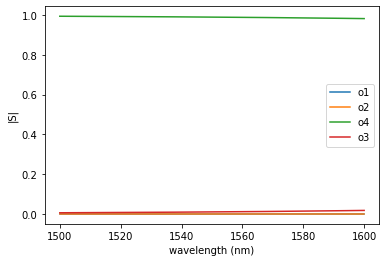

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [18]:
m = gc.coupler_ring(gap=0.3)
gs.plot_model(m, logscale=False, wavelengths=wavelengths)

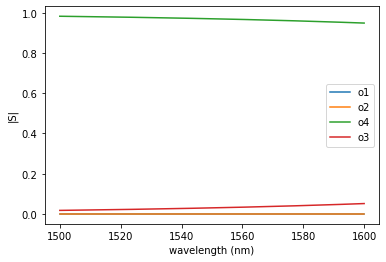

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [19]:
m = gc.coupler(gap=0.3)
gs.plot_model(m, logscale=False, wavelengths=wavelengths)

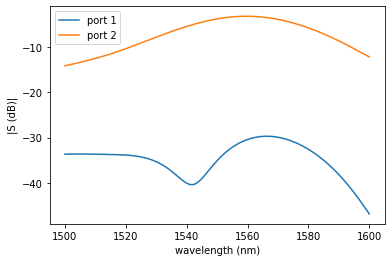

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [20]:
m = gc.gc1550te()
gs.plot_model(m, logscale=True, pin_in="port 1")

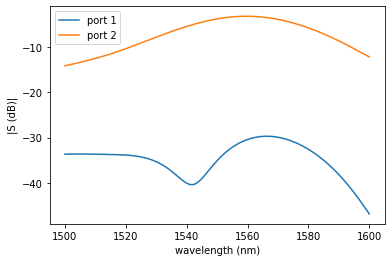

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [21]:
m = gc.gc1550te()
gs.plot_model(m, logscale=True, pin_in="port 1")

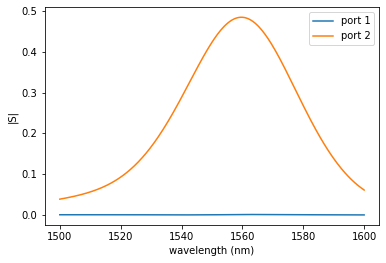

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [22]:
m = gc.gc1550te()
gs.plot_model(m, logscale=False, pin_in="port 1")

## Circuit simulations

With Simphony you can also combine components into circuits

### MZI interferometer

In [23]:
import matplotlib.pyplot as plt
import gdsfactory.simulation.simphony as gs
import gdsfactory.simulation.simphony.components as gc
import gdsfactory as gf

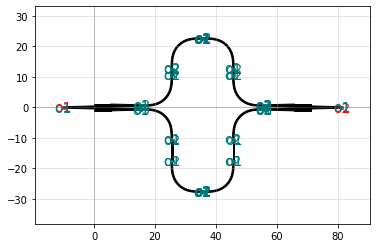

mzi_delta_length10: uid 21, ports ['o1', 'o2'], aliases [], 0 polygons, 20 references

In [24]:
c = gf.components.mzi(delta_length=10)
c

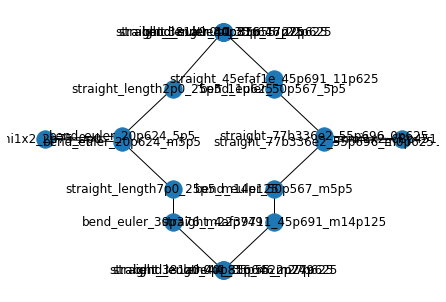

In [25]:
c.plot_netlist()

2022-06-30 06:16:54.123 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:130 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_eaca167b.dat


2022-06-30 06:16:54.141 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:130 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_eaca167b.dat


2022-06-30 06:16:54.159 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


2022-06-30 06:16:54.160 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


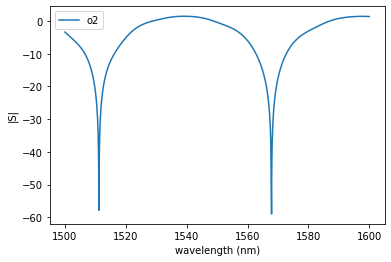

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [26]:
circuit = gs.components.mzi(delta_length=10, splitter=gs.components.mmi1x2)

gs.plot_circuit(
    circuit,
    start=1500e-9,
    stop=1600e-9,
    logscale=True,
)

2022-06-30 06:17:06.092 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:130 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_eaca167b.dat


2022-06-30 06:17:06.110 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:130 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_eaca167b.dat


2022-06-30 06:17:06.128 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


2022-06-30 06:17:06.129 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


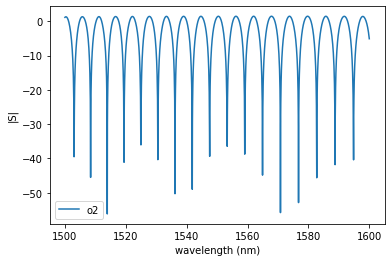

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [27]:
circuit = gs.components.mzi(delta_length=100, splitter=gs.components.mmi1x2)

gs.plot_circuit(
    circuit,
    start=1500e-9,
    stop=1600e-9,
    logscale=True,
)

Lets add grating couplers to the mzi circuit.

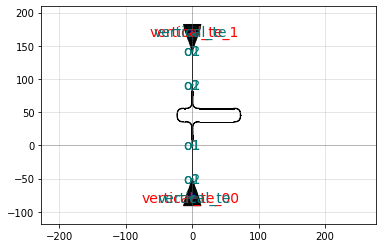

mzi_delta_length100_mov_1c54ec7f: uid 29, ports ['vertical_te_00', 'vertical_te_1'], aliases [], 0 polygons, 5 references

In [28]:
mzi_layout = gf.components.mzi(delta_length=100)
mzi_with_gc_layout = gf.routing.add_fiber_single(
    component=mzi_layout, with_loopback=False
)
mzi_with_gc_layout

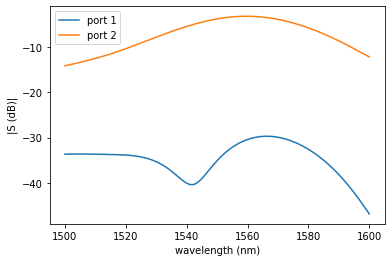

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [29]:
c = gc.gc1550te()
gs.plot_model(c, pin_in="port 1")

### MZI intereferometer from layout

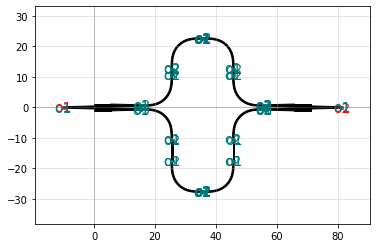

mzi_delta_length10: uid 21, ports ['o1', 'o2'], aliases [], 0 polygons, 20 references

In [30]:
import gdsfactory as gf
import gdsfactory.simulation.simphony as gs
import gdsfactory.simulation.simphony.components as gc
from simphony.libraries import siepic

c = gf.components.mzi(delta_length=10)
c

2022-06-30 06:17:18.468 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:130 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_eaca167b.dat


2022-06-30 06:17:18.487 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:130 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_eaca167b.dat


2022-06-30 06:17:18.505 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys(['cross_section'])


2022-06-30 06:17:18.506 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys(['cross_section'])


2022-06-30 06:17:18.508 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys(['cross_section'])


2022-06-30 06:17:18.510 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys(['cross_section'])


2022-06-30 06:17:18.511 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys(['cross_section'])


2022-06-30 06:17:18.513 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys(['cross_section'])


2022-06-30 06:17:18.515 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


2022-06-30 06:17:18.516 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


2022-06-30 06:17:18.517 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


2022-06-30 06:17:18.519 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


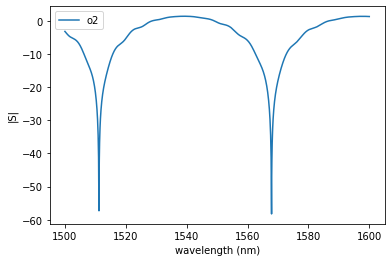

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [31]:
cm = gs.component_to_circuit(c)
gs.plot_circuit(cm)

In [32]:
c = gf.components.mzi(
    delta_length=20
)  # Double the delta length should reduce FSR by half
cm = gs.component_to_circuit(c)

2022-06-30 06:17:39.775 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:130 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_eaca167b.dat


2022-06-30 06:17:39.793 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:130 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_eaca167b.dat


2022-06-30 06:17:39.810 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys(['cross_section'])


2022-06-30 06:17:39.811 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys(['cross_section'])


2022-06-30 06:17:39.814 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys(['cross_section'])


2022-06-30 06:17:39.814 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys(['cross_section'])


2022-06-30 06:17:39.816 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys(['cross_section'])


2022-06-30 06:17:39.817 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys(['cross_section'])


2022-06-30 06:17:39.819 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


2022-06-30 06:17:39.820 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


2022-06-30 06:17:39.821 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


2022-06-30 06:17:39.822 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


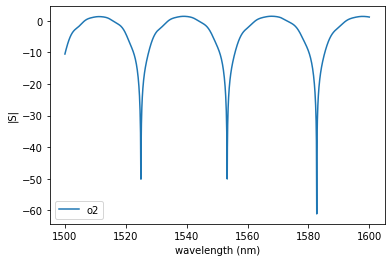

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [33]:
gs.plot_circuit(cm)

### Ring resonator


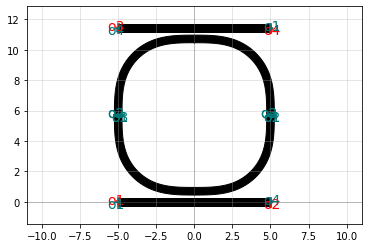

ring_double_radius5: uid 52, ports ['o1', 'o2', 'o3', 'o4'], aliases [], 0 polygons, 4 references

In [34]:
c = gf.components.ring_double(radius=5)
c

2022-06-30 06:18:01.116 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


2022-06-30 06:18:01.118 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


/home/runner/work/gdsfactory/gdsfactory/gdsfactory/simulation/simphony/plot_circuit.py:54: RuntimeWarning: divide by zero encountered in log10
  y = 10 * np.log10(y) if logscale else y


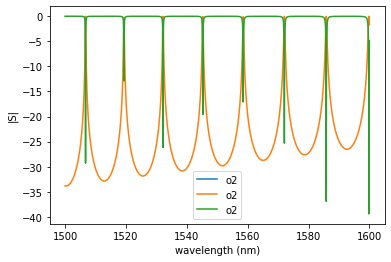

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [35]:
c = gc.ring_double(radius=5)
gs.plot_circuit(c, pins_out=["o2", "o3", "o4"])

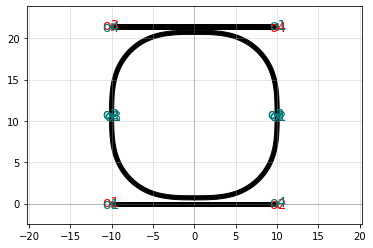

ring_double_radius10: uid 58, ports ['o1', 'o2', 'o3', 'o4'], aliases [], 0 polygons, 4 references

In [36]:
c = gf.components.ring_double(radius=10)  # double radius, reduces FSR by half.
c

2022-06-30 06:18:33.012 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


2022-06-30 06:18:33.014 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


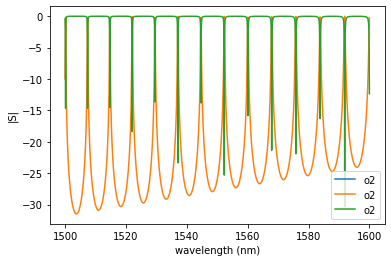

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [37]:
c = gs.components.ring_double(radius=10)
gs.plot_circuit(c, pins_out=["o2", "o3", "o4"])